In [1]:
import os
import mpltern
import src.helper as h
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt
from scipy.stats import entropy
from mpltern.datasets import get_dirichlet_pdfs

In [ ]:
python synthetic_noise_analysis.py 1 3 5
python synthetic_noise_analysis.py 1 4 5
python synthetic_noise_analysis.py 1 5 5
python synthetic_noise_analysis.py 1 6 5
python synthetic_noise_analysis.py 1 7 5
python synthetic_noise_analysis.py 1 8 5
python synthetic_noise_analysis.py 1 9 5
python synthetic_noise_analysis.py 1 10 5
python synthetic_noise_analysis.py 1 3 10
python synthetic_noise_analysis.py 1 4 10
python synthetic_noise_analysis.py 1 5 10
python synthetic_noise_analysis.py 1 6 10
python synthetic_noise_analysis.py 1 7 10
python synthetic_noise_analysis.py 1 8 10
python synthetic_noise_analysis.py 1 9 10
python synthetic_noise_analysis.py 1 10 10
python synthetic_noise_analysis.py 1 3 50
python synthetic_noise_analysis.py 1 4 50
python synthetic_noise_analysis.py 1 5 50
python synthetic_noise_analysis.py 1 6 50
python synthetic_noise_analysis.py 1 7 50
python synthetic_noise_analysis.py 1 8 50
python synthetic_noise_analysis.py 1 9 50
python synthetic_noise_analysis.py 1 10 50
python synthetic_noise_analysis.py 1 3 100
python synthetic_noise_analysis.py 1 4 100
python synthetic_noise_analysis.py 1 5 100
python synthetic_noise_analysis.py 1 6 100
python synthetic_noise_analysis.py 1 7 100
python synthetic_noise_analysis.py 1 8 100
python synthetic_noise_analysis.py 1 9 100
python synthetic_noise_analysis.py 1 10 100
python synthetic_noise_analysis.py 1 3 200
python synthetic_noise_analysis.py 1 4 200
python synthetic_noise_analysis.py 1 5 200
python synthetic_noise_analysis.py 1 6 200
python synthetic_noise_analysis.py 1 7 200
python synthetic_noise_analysis.py 1 8 200
python synthetic_noise_analysis.py 1 9 200
python synthetic_noise_analysis.py 1 10 200

In [ ]:
python synthetic_noise_analysis.py 0 3 200
python synthetic_noise_analysis.py 0 4 200
python synthetic_noise_analysis.py 0 5 200
python synthetic_noise_analysis.py 0 6 200
python synthetic_noise_analysis.py 0 7 200
python synthetic_noise_analysis.py 0 8 200
python synthetic_noise_analysis.py 0 9 200
python synthetic_noise_analysis.py 0 10 200

In [68]:
q = {}
q[(1,2)] = 4

In [74]:
lambda_tilde_test.shape

(500, 10)

In [75]:
np.arange(n_classes)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
wasserstein_distance(np.arange(n_classes), np.arange(n_classes), lambda_hat_test[i], lambda_hat_test[i])

0.0

In [2]:
simplex_res = 0.001
simplex = np.load(os.path.join("data", "simplex", str(simplex_res)+".npy"))

# DATA GENERATION

observing non-noisy posteriors

In [327]:

exp_seed = 200
np.random.seed(exp_seed)

(array([124., 122., 145., 196., 209., 219., 211., 178.,  84.,  12.]),
 array([8.52193701e-04, 9.08645387e-02, 1.80876884e-01, 2.70889229e-01,
        3.60901574e-01, 4.50913919e-01, 5.40926264e-01, 6.30938609e-01,
        7.20950954e-01, 8.10963299e-01, 9.00975644e-01]),
 <BarContainer object of 10 artists>)

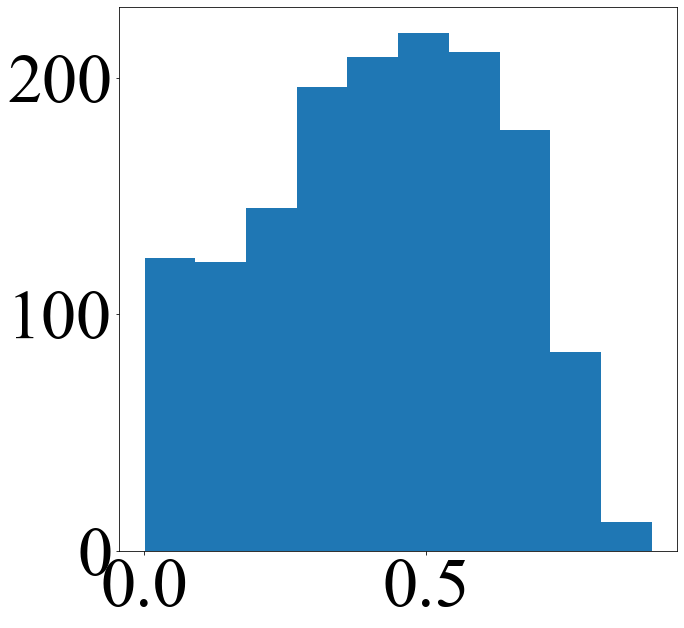

In [55]:
n1 = 500
n = 3*n1 
n_classes = 10

X = np.random.normal(loc=0.0, scale=1.0, size=(n,10))
beta = np.random.normal(loc=0.0, scale=1.0, size=(10,n_classes))
Z = np.exp(np.matmul(X,beta))
W = Z/Z.sum(axis=1)[:,None]

plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 70
plt.hist(entropy(W,axis=1,base=n_classes))

In [56]:
W.shape

(1500, 10)

In [57]:
W_annotated = {}
for annotator_num in [1, 5, 10, 50, 100, 200, 1000]:

    W_annotated[annotator_num] = np.array([np.random.multinomial(annotator_num, i) for i in W])/annotator_num

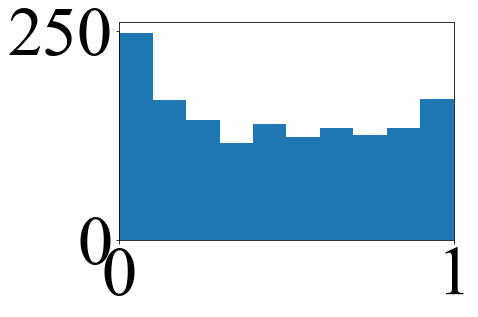

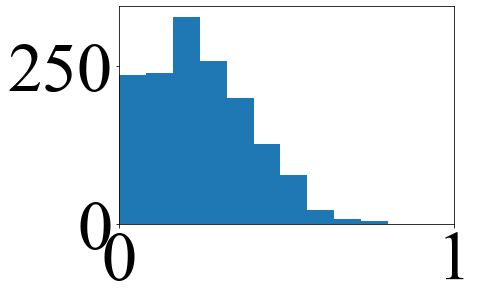

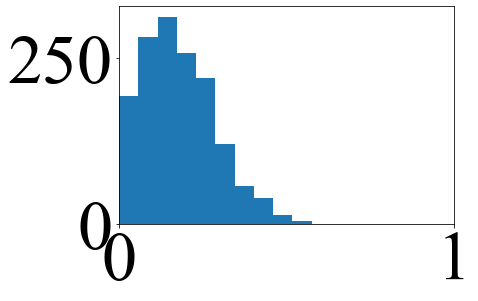

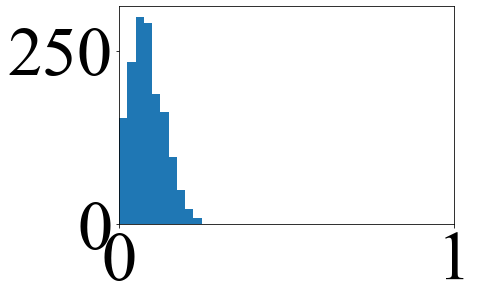

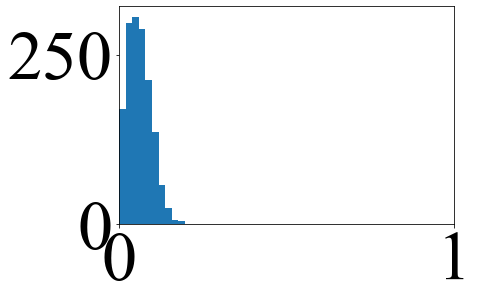

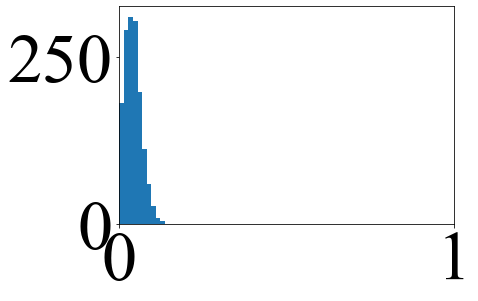

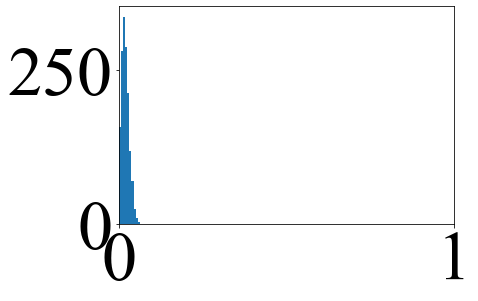

In [58]:
for annotator_num in [1, 5, 10, 50, 100, 200, 1000]:
    plt.figure()
    tv = 0.5*np.sum(np.abs(W-W_annotated[annotator_num]), axis=1)
    plt.hist(tv)
    plt.xlim([0,1])

In [59]:
X_train, X_test, lambda_train, lambda_test, lambda_tilde_train, lambda_tilde_test = train_test_split(X, W, W_annotated[200], test_size=n1)
X_proper_train, X_calib, lambda_proper_train, lambda_calib, lambda_tilde_proper_train, lambda_tilde_calib= train_test_split(X_train, lambda_train, lambda_tilde_train, test_size=n1)

# Learning according to our procedures

In [60]:
from scipy.stats import entropy, wasserstein_distance
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
tfd = tfp.distributions
from src.model import dirichlet_nll_loss_with_regularization, predictor

In [61]:
model = predictor(order="first", feature_dim=X.shape[1], n_classes=n_classes)
loss_fn = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=Adam(learning_rate=1e-4), loss=loss_fn)
model.fit(X_proper_train, lambda_tilde_proper_train, epochs=100, batch_size=8)

Epoch 1/100


63/63 [==============================] - 1s 1ms/step - loss: 2.3099
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 2.2432
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 2.1888
Epoch 4/100
63/63 [==============================] - 0s 975us/step - loss: 2.1199
Epoch 5/100
63/63 [==============================] - 0s 934us/step - loss: 2.0572
Epoch 6/100
63/63 [==============================] - 0s 952us/step - loss: 2.0129
Epoch 7/100
63/63 [==============================] - 0s 884us/step - loss: 1.9630
Epoch 8/100
63/63 [==============================] - 0s 907us/step - loss: 1.9213
Epoch 9/100
63/63 [==============================] - 0s 955us/step - loss: 1.8785
Epoch 10/100
63/63 [==============================] - 0s 939us/step - loss: 1.8351
Epoch 11/100
63/63 [==============================] - 0s 967us/step - loss: 1.7997
Epoch 12/100
63/63 [==============================] - 0s 941us/step - loss: 1.7825
Epoch 13/100
63/63 [===========

In [62]:
model.evaluate(X_test, lambda_tilde_test)

16/16 [==============================] - 0s 1ms/step - loss: 1.1018


1.10178542137146

In [63]:
model.evaluate(X_test, lambda_test)

16/16 [==============================] - 0s 1ms/step - loss: 1.1024


1.1024495363235474

In [64]:
lambda_hat_calib = model.predict(X_calib)
lambda_hat_test = model.predict(X_test)
distance_functions = ["tv", "kl", "inner"]
calib_scores = {k: [] for k in distance_functions}
for i in range(lambda_hat_calib.shape[0]):
    calib_scores["tv"].append(h.tv(lambda_hat_calib[i], lambda_calib[i]))
    calib_scores["kl"].append(entropy(lambda_calib[i], lambda_hat_calib[i], base=2))
    calib_scores["inner"].append(1-np.inner(lambda_hat_calib[i], lambda_calib[i]))


16/16 [==============================] - 0s 1ms/step


16/16 [==============================] - 0s 1ms/step


In [65]:
alpha = 0.1
q = {}
for d in calib_scores.keys():
    q[d] = h.compute_quantile(calib_scores[d], alpha)
    print(d, q[d])

tv 0.28424502975983074
kl 0.3664900747741043
inner 0.7890023163238841


In [66]:
lambda_hat_calib = model.predict(X_calib)
lambda_hat_test = model.predict(X_test)
distance_functions = ["tv", "kl", "inner"]
calib_scores = {k: [] for k in distance_functions}
for i in range(lambda_hat_calib.shape[0]):
    calib_scores["tv"].append(h.tv(lambda_hat_calib[i], lambda_tilde_calib[i]))
    calib_scores["kl"].append(entropy(lambda_tilde_calib[i], lambda_hat_calib[i], base=2))
    calib_scores["inner"].append(1-np.inner(lambda_hat_calib[i], lambda_tilde_calib[i]))


16/16 [==============================] - 0s 2ms/step


16/16 [==============================] - 0s 1ms/step


In [67]:
q = {}
for d in calib_scores.keys():
    q[d] = h.compute_quantile(calib_scores[d], alpha)
    print(d, q[d])

tv 0.28830361865460874
kl 0.40475410110191173
inner 0.7855510670412332


In [32]:
cvg = {k: 0 for k in calib_scores.keys()}
for i in range(lambda_hat_test.shape[0]):
    cvg["tv"] += (h.tv(lambda_hat_test[i], lambda_tilde_test[i]) <q["tv"])
    cvg["kl"] += (entropy(lambda_tilde_test[i], lambda_hat_test[i], base=2) <q["kl"])
    cvg["inner"] += ((1-np.inner(lambda_hat_test[i], lambda_tilde_test[i])) <q["inner"])


In [19]:
for d in calib_scores.keys():
    cvg[d] = cvg[d]/lambda_hat_test.shape[0]
    print(d, ": coverage is ", cvg[d])

tv : coverage is  0.93
kl : coverage is  0.9
inner : coverage is  0.93


In [20]:
cvg = {k: 0 for k in calib_scores.keys()}
for i in range(lambda_hat_test.shape[0]):
    cvg["tv"] += (h.tv(lambda_hat_test[i], lambda_test[i]) <q["tv"])
    cvg["kl"] += (entropy(lambda_test[i], lambda_hat_test[i], base=2) <q["kl"])
    cvg["inner"] += ((1-np.inner(lambda_hat_test[i], lambda_test[i])) <q["inner"])


In [21]:
for d in calib_scores.keys():
    cvg[d] = cvg[d]/lambda_hat_test.shape[0]
    print(d, ": coverage is ", cvg[d])

tv : coverage is  0.92
kl : coverage is  0.89
inner : coverage is  0.93


In [22]:
for k in range(lambda_test.shape[0]):
    p = lambda_test[k]
    if entropy(p, base=3) > 0.97:
        print(k) 

17
21
32
34
42
45
57
63
69
87
95


In [346]:
k = np.random.randint(lambda_test.shape[0])
# k = 41
p = lambda_test[k]
p_annotated = lambda_tilde_test[k]
ph = lambda_hat_test[k]

In [347]:
from scipy.stats import entropy, wasserstein_distance
idx = {}

idx["tv"] = np.where((0.5*np.sum(np.abs(ph-simplex), axis=1))< q["tv"])[0]

idx["kl"] = np.where(entropy(simplex, ph, base=2, axis=1)< q["kl"])[0]

idx["inner"] = np.where((1-np.inner(ph, simplex))< q["inner"])[0]


# probs = (dist_pred_test[k].prob(simplex)).numpy()
# idx["so"] = np.where(probs/np.max(probs) >= (1-q["so"]))[0]

# idx_ws = []
# ws_dis = []
# for i in range(simplex.shape[0]):
#     if wasserstein_distance([0,1,2], [0,1,2], ph, simplex[i]) < q["ws"]:
#         idx_ws.append(i)
# idx["ws"] = idx_ws


In [348]:
credal_color = (57/255, 172/255, 115/255) #greenish
credal_color2 = (0/255, 179/255, 179/255) #blueish
gt_color = (255/255,153/255,0/255) #orangish
gt_color2 = (255/255,117/255,26/255)

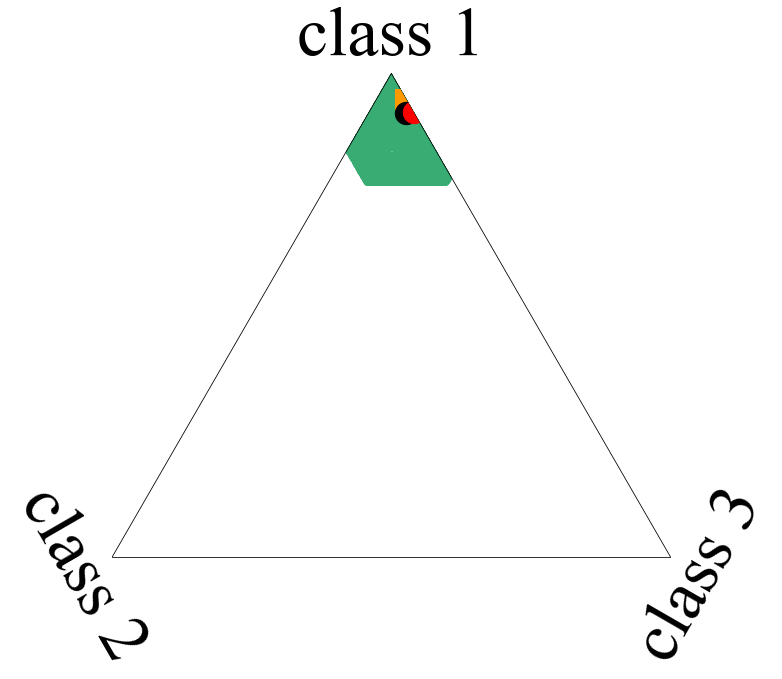

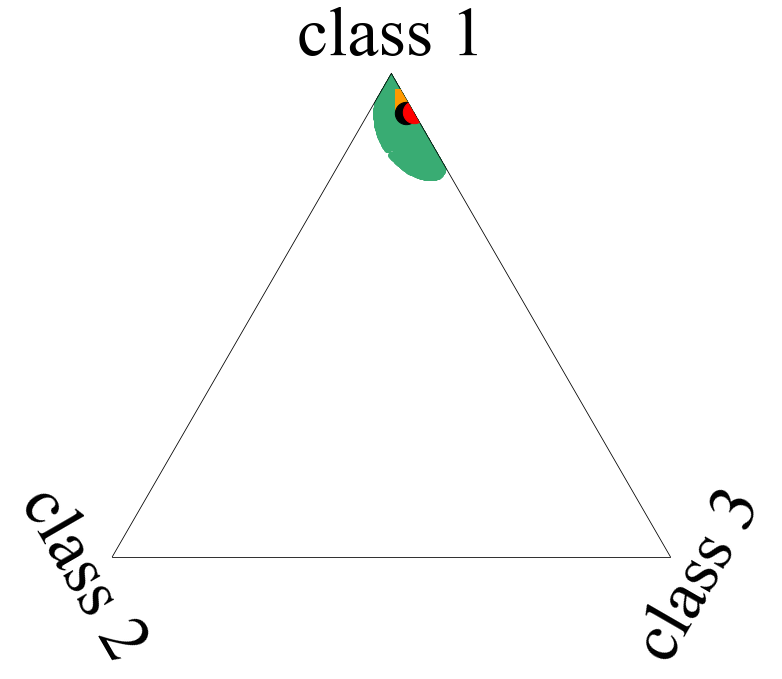

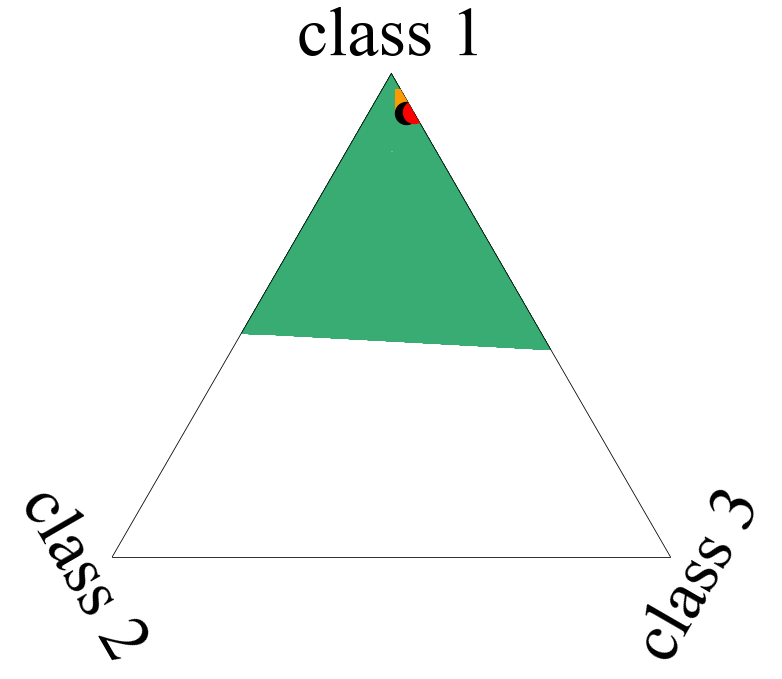

In [349]:
 
methods = calib_scores.keys()
for m in ["tv", "kl", "inner"]:
    plt.figure(figsize=(10,10))
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = 70
    ax = plt.subplot(projection="ternary")
    ax.set_tlabel("class 1")
    ax.set_llabel("class 2")
    ax.set_rlabel("class 3")
    ax.tick_params(tick1On=False, tick2On=False, label1On=False, label2On=False)
    ax.scatter(simplex[idx[m],0], simplex[idx[m],1], simplex[idx[m],2], color=credal_color,  rasterized=True)
    ax.scatter(p[0], p[1], p[2], s=500, marker="s", color=gt_color, zorder=3)
    ax.scatter(ph[0], ph[1], ph[2], s=500, c='k', zorder=3, label="Predcited distribution")
    ax.scatter(p_annotated[0], p_annotated[1], p_annotated[2], s=500, c='red', zorder=3, label="annotated distribution")


In [350]:
set_size_test_tv = []
for k in range(lambda_hat_test.shape[0]):
    ph = lambda_hat_test[k]
    idx_tv = np.where((0.5*np.sum(np.abs(ph-simplex), axis=1))< q["tv"])[0]
    set_size_test_tv.append(len(idx_tv))

In [351]:
np.mean(set_size_test_tv)/simplex.shape[0]

0.0836194809811589

In [326]:
np.std(set_size_test_tv)/simplex.shape[0]

0.019752259753343725

In [282]:
X_train, X_test, lambda_train, lambda_test, lambda_tilde_train, lambda_tilde_test = train_test_split(X, W, W_annotated[200], test_size=n1)
X_proper_train, X_calib, lambda_proper_train, lambda_calib, lambda_tilde_proper_train, lambda_tilde_calib= train_test_split(X_train, lambda_train, lambda_tilde_train, test_size=n1)

In [352]:
model = predictor(order="second", feature_dim=X.shape[1], n_classes=n_classes)
loss_fn = dirichlet_nll_loss_with_regularization
model.compile(optimizer=Adam(learning_rate=1e-4), loss=loss_fn)
model.fit(X_proper_train, lambda_tilde_proper_train, epochs=100, batch_size=8)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: -0.4684
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: -0.5269
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: -0.5370
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: -0.6395
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: -0.6459
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: -0.6840
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: -0.6826
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: -0.7126
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: -0.7486
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: -0.6830
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: -0.7053
Epoch 12/100
13/13 [==============================] - 0s 1ms/step - loss: -0.7159
Epoch 13/100
13/13 [=====

In [353]:
alpha_calib = model.predict(X_calib) + 1 
alpha_test = model.predict(X_test) + 1
dist_lambda_hat_calib = tfd.Dirichlet(alpha_calib)
calib_scores = []
calib_scores_ideal = []
for k in range(X_calib.shape[0]):
    probs = (dist_lambda_hat_calib[k].prob(simplex)).numpy()
    p_lambda = dist_lambda_hat_calib[k].prob(lambda_calib[k]).numpy()
    p_lambda_tilde = dist_lambda_hat_calib[k].prob(lambda_tilde_calib[k]).numpy()
    calib_scores_ideal.append(1-p_lambda/(np.max(probs)))
    calib_scores.append(1-p_lambda_tilde/(np.max(probs)))

4/4 [==============================] - 0s 3ms/step


(array([43., 22., 10.,  8.,  5.,  3.,  3.,  3.,  0.,  3.]),
 array([-1.19209290e-07,  9.60761171e-02,  1.92152353e-01,  2.88228590e-01,
         3.84304826e-01,  4.80381062e-01,  5.76457299e-01,  6.72533535e-01,
         7.68609771e-01,  8.64686007e-01,  9.60762244e-01]),
 <BarContainer object of 10 artists>)

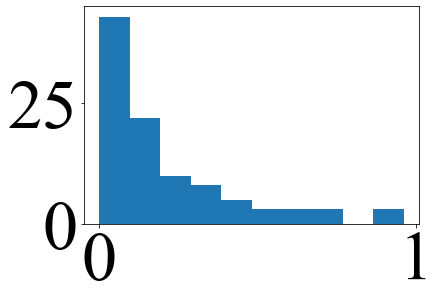

In [354]:
plt.hist(calib_scores)

In [355]:
alpha = 0.2 

In [356]:
q= h.compute_quantile(calib_scores, alpha)
q

0.3567768931388855

In [357]:
dist_pred_test = tfd.Dirichlet(alpha_test)

In [358]:
X_test.shape

(100, 10)

In [359]:
k = np.random.randint(lambda_test.shape[0])
# k = 41
p = lambda_test[k]
p_annotated = lambda_tilde_test[k]

probs = (dist_pred_test[k].prob(simplex)).numpy()
ix_so = np.where(probs/np.max(probs) >= (1-q))[0]
print(p)

[0.40177336 0.04494531 0.55328133]


In [360]:
simplex[ix_so]

array([[0.022, 0.198, 0.78 ],
       [0.022, 0.199, 0.779],
       [0.022, 0.2  , 0.778],
       ...,
       [0.764, 0.07 , 0.166],
       [0.764, 0.071, 0.165],
       [0.764, 0.072, 0.164]])

c:\Users\Alireza\.conda\envs\rul_unc\lib\site-packages\mpltern\_ternary_parsers.py:35: UserWarning: The following kwargs were not used by contour: 'label'
  return f(ax, *args, **kwargs)


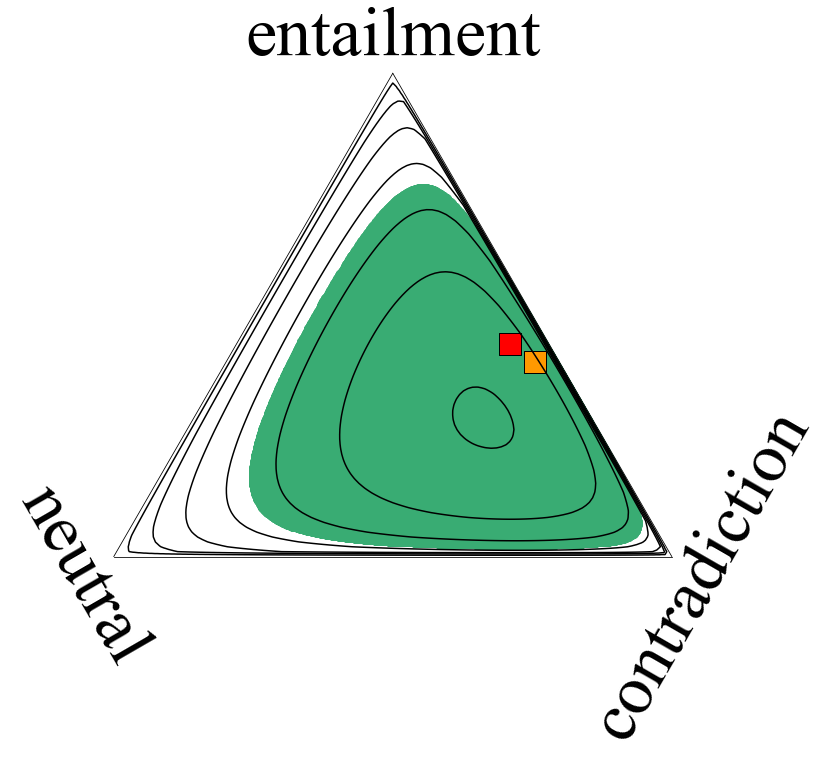

In [361]:
plt.figure(figsize=(10,10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 70
ax = plt.subplot(projection="ternary")
ax.set_tlabel("entailment")
ax.set_llabel("neutral")
ax.set_rlabel("contradiction")
ax.tick_params(tick1On=False, tick2On=False, label1On=False, label2On=False)
ax.scatter(simplex[ix_so,0], simplex[ix_so,1], simplex[ix_so,2], color=credal_color,  rasterized=True)
ax.scatter(p[0], p[1], p[2], s=500, marker="s", color=gt_color, edgecolors="k", zorder=3)
ax.scatter(p_annotated[0], p_annotated[1], p_annotated[2], s=500, marker="s", color='r', edgecolors="k", zorder=3)
t, l, r, v = get_dirichlet_pdfs(n=100, alpha=alpha_test[k])
ax.tricontour(t, l, r, v, colors="k", linewidths=1.5, zorder=3, label="Predcited second_order distribution")
      

In [362]:
set_size_test_so = []
for k in range(X_test.shape[0]):
    probs = (dist_pred_test[k].prob(simplex)).numpy()
    ix_so = np.where(probs/np.max(probs) >= (1-q))[0]
    set_size_test_so.append(len(ix_so))

In [363]:
np.mean(set_size_test_so)/simplex.shape[0]

0.1806547966075872

In [364]:
np.std(set_size_test_so)/simplex.shape[0]

0.16652206562121957

In [ ]:
python synthetic_test.py 9 1 0.05
python synthetic_test.py 9 5 0.05
python synthetic_test.py 9 10 0.05
python synthetic_test.py 9 50 0.05
python synthetic_test.py 9 100 0.05
python synthetic_test.py 9 200 0.05

## Classic learning scenario
1. taking the posterior mode as the label for training data
2. using X,y for training a classifier, GB as learner

In [9]:
y_proper_train = []
for i in range(X_proper_train.shape[0]):
    y_proper_train.append(np.argmax(W_proper_train[i]))

y_proper_train = np.array(y_proper_train)

In [10]:
classifier = HistGradientBoostingClassifier(random_state=0).fit(X_proper_train, y_proper_train)

## Calibration (Algorithm 1 in paper)

using X,w for calibration using algorithm 1 with total varation distance as nonconformity score

In [11]:
phat_calib = classifier.predict_proba(X_calib)

cal_scores = []

for i in range(X_calib.shape[0]):
    cal_scores.append(h.tv(phat_calib[i], W_calib[i]))

q = h.compute_quantile(cal_scores, 0.1)

### coverage

In [12]:
phat_test = classifier.predict_proba(X_test)

t = 0
for i in range(X_test.shape[0]):
    t += (h.tv(phat_test[i], W_test[i]) <q)

print("coverage is ", t/X_test.shape[0])

coverage is  0.9016


### Some VISUALIZATION
1. Since simplex space is continuous and we can not calculate the distance between every point in that space and the predicted distribution, we need to discretize the simplex space. 
2. For each element in that finite set, we calculate the distacne to the predicted distribution and if it is less than q, we add it to the prediction set.  

In [13]:
simplex = h.dicrete_simplex(n_samples=500000, n_classes=3)

In [14]:
k = np.random.randint(X_test.shape[0])
ph = phat_test[k]
p = W_test[k]
idx = []
for i in range(simplex.shape[0]):
    if h.tv(ph, simplex[i]) < q:
        idx.append(i)

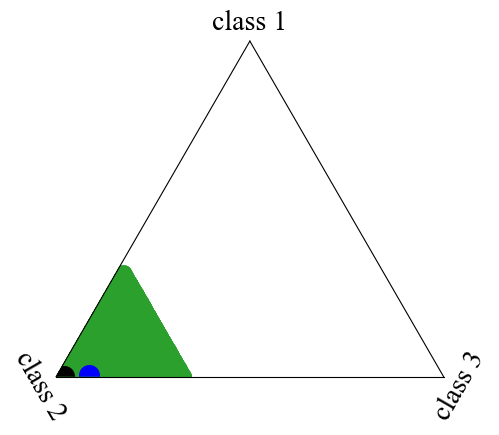

In [15]:
plt.figure(dpi=100, figsize=(5,5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20
ax = plt.subplot(projection="ternary")
ax.set_tlabel("class 1")
ax.set_llabel("class 2")
ax.set_rlabel("class 3")
ax.tick_params(tick1On=False, tick2On=False, label1On=False, label2On=False)

ax.scatter(simplex[idx,0], simplex[idx,1], simplex[idx,2], c='tab:green', label="CP set")
ax.scatter(p[0], p[1], p[2], s=200, c='b', label="Ground truth distribution")
ax.scatter(ph[0], ph[1], ph[2], s=200, c='k', label="Predcited distribution")
# plt.savefig(os.path.join("credals", str(h.tv(phat_test[k], W_test[k]) <q)+str(k) + str( [ '%.2f' % elem for elem in p ])+'.pdf'), format='pdf', bbox_inches='tight', pad_inches=0)

## Evidential deep learning scenario

1. taking the posterior mode as the label for training data
2. using X,y for training an evidential deep network


[some help from this link](https://www.kaggle.com/code/kooaslansefat/evidential-deep-learning-and-reliability) 

other useful links: 
[classification](https://github.com/dougbrion/pytorch-classification-uncertainty)
[regression](https://github.com/aamini/evidential-deep-learning)

In [49]:
import tensorflow as tf
from keras import backend as K
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
from scipy.stats import dirichlet
from mpltern.datasets import get_dirichlet_pdfs

## deep learning model

In [95]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        # tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(3),
    ])

## specific loss function

In [96]:
lgamma = tf.math.lgamma
digamma = tf.math.digamma

epochs[0] = [1]

def KL(alpha, num_classes=3):
    one = K.constant(np.ones((1,num_classes)),dtype=tf.float32)
    S = K.sum(alpha,axis=1,keepdims=True)  

    kl = lgamma(S) - K.sum(lgamma(alpha),axis=1,keepdims=True) +\
    K.sum(lgamma(one),axis=1,keepdims=True) - lgamma(K.sum(one,axis=1,keepdims=True)) +\
    K.sum((alpha - one)*(digamma(alpha)-digamma(S)),axis=1,keepdims=True)
          
    return kl


def loss_func(y_true, output):
    y_evidence = K.relu(output)
    alpha = y_evidence+1
    S = K.sum(alpha,axis=1,keepdims=True)
    p = alpha / S  

    err = K.sum(K.pow((y_true-p),2),axis=1,keepdims=True)
    var = K.sum(alpha*(S-alpha)/(S*S*(S+1)),axis=1,keepdims=True)
    
    l =  K.sum(err + var,axis=1,keepdims=True)
    l = K.sum(l)
    
    
    kl =  K.minimum(1.0, epochs[0]/50) * K.sum(KL((1-y_true)*(alpha)+y_true))
    return l + kl

In [97]:
batch_size = 100
model.compile(loss=loss_func, optimizer="adam", metrics=['accuracy'])

In [98]:
enc = OneHotEncoder(handle_unknown='ignore')
y_proper_train_one_hot = enc.fit_transform(y_proper_train.reshape((-1,1))).toarray()

In [99]:
epochs = [1]

for i in tqdm(range(1)):
    model.fit(X_proper_train, y_proper_train_one_hot, batch_size=batch_size, epochs=epochs[0], verbose=0)
    epochs[0]+=1

100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


just to check the performance of the classifier on X,y of the test set

In [100]:
y_test = []
for i in range(X_test.shape[0]):
    y_test.append(np.argmax(W_test[i]))

y_test = np.array(y_test)

In [101]:
y_test_one_hot = enc.fit_transform(y_test.reshape((-1,1))).toarray()
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 16.072900772094727
Test accuracy: 0.9147999882698059


## Calibration (Algorithm 2 in paper)

using X,w for calibration using algorithm 2 

In [102]:
phat_calib = model.predict(X_calib) 
evidence_calib = np.maximum(phat_calib, 0)
alpha_calib = evidence_calib + 1 

157/157 [==============================] - 0s 763us/step


In [103]:
cal_scores = []
for i in range(X_calib.shape[0]):
    cal_scores.append(dirichlet.pdf(W_calib[i], alpha_calib[i]))

q = h.compute_quantile(cal_scores, 0.9)

Coverage

In [104]:
phat_test = model.predict(X_test) 
evidence_test = np.maximum(phat_test, 0)
alpha_test = evidence_test + 1  


t = 0
for i in range(X_test.shape[0]):
    t += ((dirichlet.pdf(W_test[i], alpha_test[i])) >= q)

print("coverage is ", t/X_test.shape[0])

 59/157 [==========>...................] - ETA: 0s

157/157 [==============================] - 0s 850us/step
coverage is  0.8934


In [105]:
q

2.8607267928921467

### Some VISUALIZATION
1. Same strategy for simplex discretization.  
2. For each element in that finite set, if the likelihood is greater than q, it is included in the set. 

In [106]:
k = np.random.randint(X_test.shape[0])
ph = alpha_test[k]/ alpha_test[k].sum()
p = W_test[k]

In [107]:
idx = []
for i in range(simplex.shape[0]):
    if dirichlet.pdf(simplex[i], alpha_test[k]) >= q:
        idx.append(i)

In [108]:
len(idx)

137611

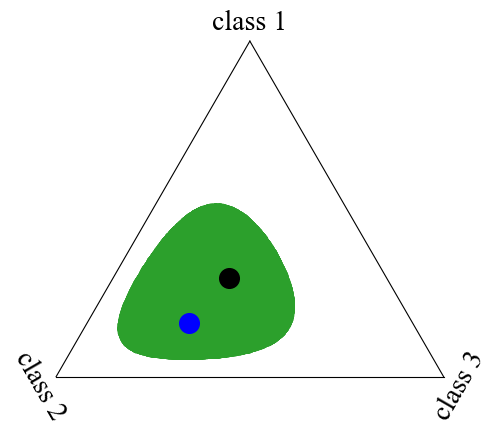

In [109]:
plt.figure(dpi=100, figsize=(5,5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20
ax = plt.subplot(projection="ternary")
ax.set_tlabel("class 1")
ax.set_llabel("class 2")
ax.set_rlabel("class 3")
ax.tick_params(tick1On=False, tick2On=False, label1On=False, label2On=False)

ax.scatter(simplex[idx,0], simplex[idx,1], simplex[idx,2], c='tab:green', label="CP set")
ax.scatter(p[0], p[1], p[2], s=200, c='b', label="Ground truth distribution")
ax.scatter(ph[0], ph[1], ph[2], s=200, c='k', label="Predcited distribution")

# plt.savefig(os.path.join("credals_ev", str((dirichlet.pdf(W_test[k], alpha_test[k])) >= q)+str(k) + str( [ '%.2f' % elem for elem in p ])+'.pdf'), format='pdf', bbox_inches='tight', pad_inches=0)


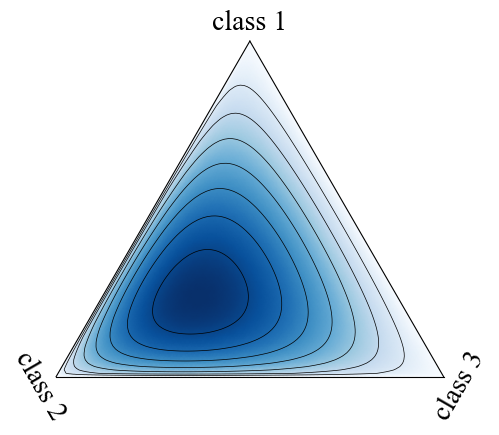

In [110]:
plt.figure(dpi=100, figsize=(5,5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20
ax = plt.subplot(projection="ternary")
ax.set_tlabel("class 1")
ax.set_llabel("class 2")
ax.set_rlabel("class 3")   
ax.tick_params(tick1On=False, tick2On=False, label1On=False, label2On=False)


cmap = "Blues"
shading = "gouraud"
t, l, r, v = get_dirichlet_pdfs(n=100, alpha=alpha_test[k])
cs = ax.tripcolor(t, l, r, v, cmap=cmap, shading=shading, rasterized=True)
ax.tricontour(t, l, r, v, colors="k", linewidths=0.5)

# plt.savefig(os.path.join("credals_ev", str((dirichlet.pdf(W_test[k], alpha)) >= q)+str(k) + str( [ '%.2f' % elem for elem in p ])+'dirichlet.pdf'), format='pdf', bbox_inches='tight', pad_inches=0)